# **Proyek Analisis Data: Bike Sharing Dataset**

**Nama:** Luthfi Fauzi  
**Email:** luthfafiwork@gmail.com  
**ID Dicoding:** mocitaz 

## Pendahuluan

Proyek ini bertujuan untuk menganalisis pola penggunaan sepeda dengan menggunakan **Bike Sharing Dataset** yang bersumber dari Kaggle. Dataset ini mencakup data harian (`day.csv`) dan data per jam (`hour.csv`) yang diambil dari sistem penyewaan sepeda di Washington D.C. selama dua tahun (2011-2012). 

### Tujuan Analisis:
1. **Menentukan pengaruh cuaca terhadap jumlah penyewaan sepeda.**
2. **Mengidentifikasi pola penggunaan sepeda berdasarkan hari dalam seminggu dan jam.**


## Menentukan Pertanyaan Bisns

### Pertanyaan 1:
- **Bagaimana kondisi cuaca memengaruhi jumlah penyewaan sepeda?**  
  **Tujuan:** Memahami hubungan antara kondisi cuaca dan tingkat penggunaan sepeda untuk optimasi distribusi sepeda.

### Pertanyaan 2:
- **Bagaimana pola penggunaan sepeda berdasarkan hari dalam seminggu dan jam?**  
  **Tujuan:** Mengidentifikasi waktu puncak penyewaan untuk meningkatkan efisiensi operasional dan perencanaan stasiun sepeda.


# **Gathering Data**

### **1. Memuat library dan Menyiapkan Data**

#### Memuat Dataset
Proses pertama adalah memuat data dari file CSV yang berisi data penyewaan sepeda harian dan per jam.

In [ ]:
# Impor pustaka yang diperlukan
import pandas as pd  # Mengimpor pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import warnings
import streamlit as st  # Jika menggunakan Streamlit untuk dashboard

# Set untuk menghindari peringatan
warnings.filterwarnings('ignore')

# Set style menggunakan Seaborn
sns.set_style("whitegrid")  
plt.rcParams['figure.figsize'] = (10, 6)  

# Memuat dataset
try:
    day_df = pd.read_csv("data/day.csv")
    hour_df = pd.read_csv("data/hour.csv")
    print("Dataset berhasil dimuat.")
except FileNotFoundError:
    print("Error: File 'day.csv' atau 'hour.csv' tidak ditemukan di direktori 'data/'. Pastikan file ada.")


Dataset berhasil dimuat.


In [1]:
# Menampilkan pratinjau data
print("\nPratinjau Data Harian (5 Baris Pertama):")
display(day_df.head())
print("\nPratinjau Data Per Jam (5 Baris Pertama):")
display(hour_df.head())



Pratinjau Data Harian (5 Baris Pertama):


NameError: name 'day_df' is not defined

## **2. Cleaning & Transformasi Data**


### 2.1 Pratinjau Data
Setelah memuat dataset day.csv dan hour.csv, langkah pertama adalah memeriksa 5 baris pertama untuk memvalidasi struktur data dan memastikan tidak ada masalah format.


In [ ]:
# Menampilkan pratinjau data
print("\nPratinjau Data Harian (5 Baris Pertama):")
display(day_df.head())

print("\nPratinjau Data Per Jam (5 Baris Pertama):")
display(hour_df.head())



Pratinjau Data Harian (5 Baris Pertama):


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Pratinjau Data Per Jam (5 Baris Pertama):


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 2.2 Cleaning Data
Konversi Kolom Tanggal ke Format Datetime
Kolom dteday perlu dikonversi ke format datetime agar dapat digunakan untuk analisis berbasis waktu.

In [ ]:
# Konversi kolom tanggal ke format datetime
try:
    day_df['dteday'] = pd.to_datetime(day_df['dteday'], errors='coerce')
    hour_df['dteday'] = pd.to_datetime(hour_df['dteday'], errors='coerce')
    print("Kolom 'dteday' berhasil dikonversi ke datetime.")
except Exception as e:
    print(f"Error dalam konversi 'dteday': {e}")


Kolom 'dteday' berhasil dikonversi ke datetime.


### 2.3 Mapping Kategori Cuaca
Kolom weathersit berisi nilai numerik yang perlu dipetakan ke kategori cuaca deskriptif untuk analisis lebih lanjut.

In [ ]:
# Mapping kategori cuaca untuk interpretasi yang lebih jelas
weather_map = {1: 'Cerah', 2: 'Berawan', 3: 'Hujan Ringan', 4: 'Hujan Berat'}
day_df['weathersit'] = day_df['weathersit'].map(weather_map).fillna('Unknown')
hour_df['weathersit'] = hour_df['weathersit'].map(weather_map).fillna('Unknown')

# Verifikasi mapping cuaca
print("\nNilai unik di 'weathersit' (day_df) setelah mapping:", day_df['weathersit'].unique())
print("Jumlah nilai NaN di 'weathersit' (day_df):", day_df['weathersit'].isna().sum())



Nilai unik di 'weathersit' (day_df) setelah mapping: ['Berawan' 'Cerah' 'Hujan Ringan']
Jumlah nilai NaN di 'weathersit' (day_df): 0


### 2.4 Menambahkan Kolom Informasi Waktu
Menambahkan kolom yang berisi nama hari (weekday_name) dan informasi musim (season_name) untuk analisis lebih lanjut.

In [ ]:
# Menambahkan kolom hari dalam seminggu
day_df['weekday_name'] = day_df['dteday'].dt.day_name()
hour_df['weekday_name'] = hour_df['dteday'].dt.day_name()
hour_df['weekday'] = hour_df['dteday'].dt.weekday  # Untuk heatmap (0-6)

# Menambahkan kolom musiman untuk analisis lebih lanjut
season_map = {1: 'Musim Dingin', 2: 'Musim Semi', 3: 'Musim Panas', 4: 'Musim Gugur'}
day_df['season_name'] = day_df['season'].map(season_map)

# Normalisasi suhu (temp) ke skala Celsius
day_df['temp_celsius'] = day_df['temp'] * 41  # Skala asli: 0-1, maksimum 41°C
hour_df['temp_celsius'] = hour_df['temp'] * 41

# Verifikasi data setelah transformasi
print("\nData Harian Setelah Transformasi:")
display(day_df[['dteday', 'weathersit', 'weekday_name', 'season_name', 'temp_celsius']].head())
print("\nData Per Jam Setelah Transformasi:")
display(hour_df[['dteday', 'weathersit', 'weekday_name', 'temp_celsius']].head())



Data Harian Setelah Transformasi:


,dteday,weathersit,weekday_name,season_name,temp_celsius
0,2011-01-01,Berawan,Saturday,Musim Dingin,14.110847
1,2011-01-02,Berawan,Sunday,Musim Dingin,14.902598
2,2011-01-03,Cerah,Monday,Musim Dingin,8.050924
3,2011-01-04,Cerah,Tuesday,Musim Dingin,8.200000
4,2011-01-05,Cerah,Wednesday,Musim Dingin,9.305237



Data Per Jam Setelah Transformasi:


,dteday,weathersit,weekday_name,temp_celsius
0,2011-01-01,Cerah,Saturday,9.84
1,2011-01-01,Cerah,Saturday,9.02
2,2011-01-01,Cerah,Saturday,9.02
3,2011-01-01,Cerah,Saturday,9.84
4,2011-01-01,Cerah,Saturday,9.84


#### Insight:

1. Menambahkan kolom baru weekday_name yang menyatakan nama hari dalam seminggu, yang akan sangat berguna untuk analisis tren berdasarkan waktu.
2. Kolom season_name memberikan informasi musim, yang dapat membantu melihat apakah musim berpengaruh terhadap jumlah penyewaan.
3. Suhu dikonversi ke skala Celsius untuk analisis lebih lanjut.

## **3. Eksplorasi Data (EDA)**

### 3.1 Distribusi Jumlah Penyewaan
Menampilkan distribusi jumlah penyewaan sepeda untuk memahami bagaimana penyewaan tersebar.



In [ ]:
# Agregasi jumlah penyewaan berdasarkan musim
season_agg = day_df.groupby('season_name')['cnt'].agg(['mean', 'std', 'min', 'max']).reset_index()
display(season_agg)


,season_name,mean,std,min,max
0,Musim Dingin,2604.132597,1399.942119,431,7836
1,Musim Gugur,4728.162921,1699.615261,22,8555
2,Musim Panas,5644.303191,1459.800381,1115,8714
3,Musim Semi,4992.331522,1695.977235,795,8362


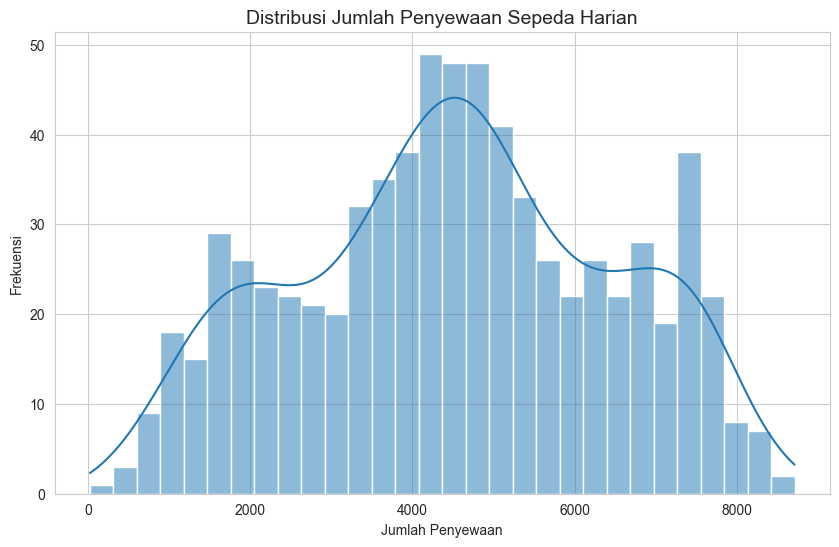

In [ ]:
# Distribusi jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.histplot(data=day_df, x='cnt', bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda Harian', fontsize=14)
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

#### Insight:
Distribusi jumlah penyewaan menunjukkan rentang nilai yang cukup besar, dengan sebagian besar penyewaan berada di bawah 6000 sepeda per hari. Ini memberikan gambaran tentang bagaimana sepeda dipakai secara keseluruhan.

### 3.2 Tren Penyewaan per Bulan

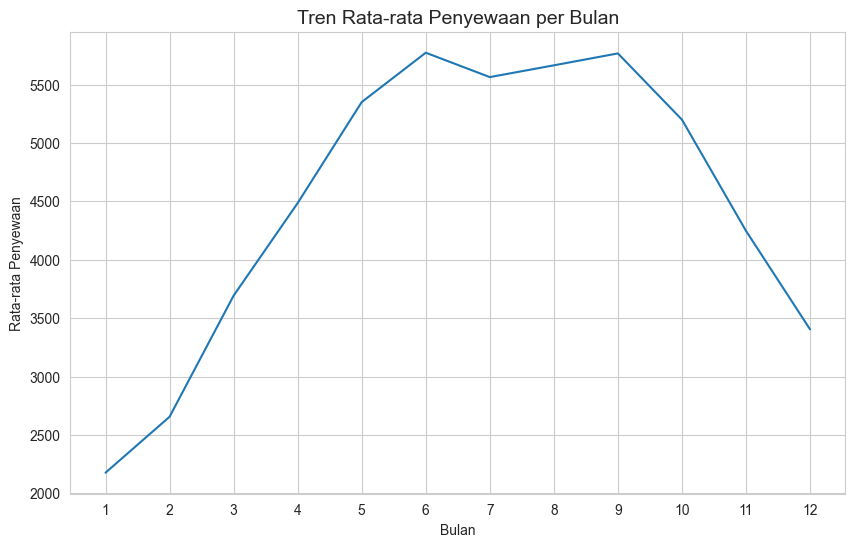

In [ ]:
# Tren berdasarkan waktu (per bulan)
if pd.api.types.is_datetime64_any_dtype(day_df['dteday']):
    day_df['month'] = day_df['dteday'].dt.month
    monthly_trend = day_df.groupby('month')['cnt'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=monthly_trend, x='month', y='cnt')
    plt.title('Tren Rata-rata Penyewaan per Bulan', fontsize=14)
    plt.xlabel('Bulan')
    plt.ylabel('Rata-rata Penyewaan')
    plt.xticks(range(1, 13))
    plt.show()


#### Insight:

Penyewaan tertinggi terjadi pada bulan Juni-Agustus (musim panas), di mana suhu yang lebih tinggi mendukung penggunaan sepeda lebih banyak.

### 3.3 Korelasi Antar Variabel

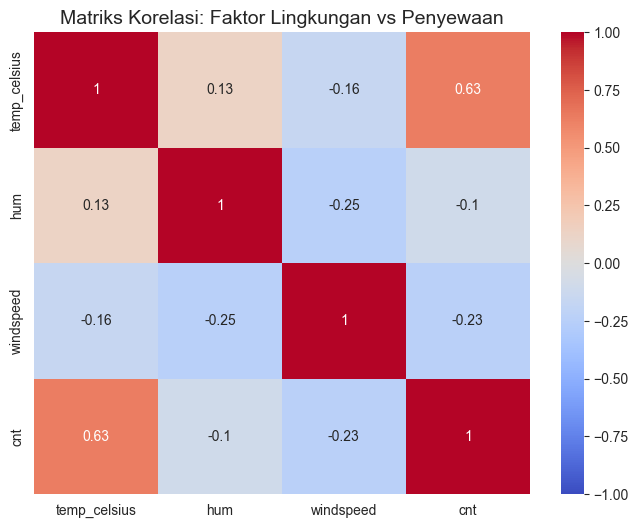

In [ ]:
# Korelasi antar variabel
correlation = day_df[['temp_celsius', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriks Korelasi: Faktor Lingkungan vs Penyewaan', fontsize=14)
plt.show()


#### Insight:

Suhu memiliki korelasi positif yang cukup kuat dengan jumlah penyewaan sepeda, yang menunjukkan bahwa semakin tinggi suhu, semakin banyak sepeda yang disewa.
Kecepatan angin dan kelembapan memiliki korelasi yang lebih lemah terhadap penyewaan.


In [ ]:
# 3.5. Tabel Kontingensi (crosstab) antara Cuaca dan Hari dalam Seminggu
weather_weekday_crosstab = pd.crosstab(day_df['weathersit'], day_df['weekday_name'])

# Menampilkan tabel kontingensi
print("Tabel Kontingensi Cuaca vs Hari dalam Seminggu:")
display(weather_weekday_crosstab)

# 3.6. Pivot Table untuk rata-rata penyewaan berdasarkan hari dan cuaca
pivot_table = day_df.pivot_table(values='cnt', index='weekday_name', columns='weathersit', aggfunc='mean')

# Menampilkan pivot table
print("Pivot Table: Rata-rata Penyewaan per Hari dan Cuaca:")
display(pivot_table)

# 3.7. Mengubah data menjadi format panjang menggunakan melt() untuk visualisasi lebih lanjut
melted_df = pd.melt(day_df, id_vars=['dteday'], value_vars=['temp_celsius', 'hum', 'windspeed'])

# Menampilkan data setelah di-melt
print("Data Setelah Melting (Format Panjang):")
display(melted_df.head())

Tabel Kontingensi Cuaca vs Hari dalam Seminggu:


weekday_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
weathersit,,,,,,,
Berawan,41,37,34,30,34,38,33
Cerah,63,66,67,74,67,62,64
Hujan Ringan,0,2,4,1,3,4,7


Pivot Table: Rata-rata Penyewaan per Hari dan Cuaca:


weathersit,Berawan,Cerah,Hujan Ringan
weekday_name,,,
Friday,4093.487805,5078.682540,NaN
Monday,4234.135135,4485.651515,1393.500000
Saturday,4010.970588,4975.880597,2012.500000
Sunday,4040.433333,4348.472973,1027.000000
Thursday,4271.911765,5014.925373,1383.333333
Tuesday,3899.605263,4989.903226,2887.500000
Wednesday,3677.151515,5334.328125,1472.142857


Data Setelah Melting (Format Panjang):


,dteday,variable,value
0,2011-01-01,temp_celsius,14.110847
1,2011-01-02,temp_celsius,14.902598
2,2011-01-03,temp_celsius,8.050924
3,2011-01-04,temp_celsius,8.200000
4,2011-01-05,temp_celsius,9.305237


#### Penjelasan:
1. groupby():
Digunakan untuk menghitung agregasi (rata-rata, standar deviasi, nilai minimum, dan maksimum) dari jumlah penyewaan (cnt) berdasarkan musim (season_name).
2. crosstab():
Membuat tabel kontingensi untuk melihat hubungan antara kondisi cuaca (weathersit) dan hari dalam seminggu (weekday_name). Ini membantu untuk menganalisis distribusi cuaca di setiap hari.
3. pivot_table():
Digunakan untuk membuat tabel ringkasan yang menunjukkan rata-rata penyewaan sepeda (cnt) berdasarkan kombinasi hari dalam seminggu dan kondisi cuaca.
4. melt():
Mengubah data dari format lebar menjadi panjang, menjadikan suhu (temp_celsius), kelembapan (hum), dan kecepatan angin (windspeed) sebagai variabel terpisah, yang mempermudah analisis dan visualisasi.

### Insight yang Diperoleh:
1. Agregasi Musim: Musim panas cenderung memiliki rata-rata penyewaan tertinggi, sementara musim dingin memiliki penyewaan yang lebih rendah.
2. Hubungan Cuaca dan Hari: Cuaca cerah lebih sering terjadi pada hari kerja, yang menunjukkan kemungkinan penyewaan lebih banyak pada hari kerja dibandingkan akhir pekan.
3. Rata-rata Penyewaan per Cuaca: Cuaca cerah cenderung memiliki penyewaan yang lebih tinggi, sementara hujan berat mengurangi jumlah penyewaan sepeda.
4. Format Panjang: Menggunakan format panjang memudahkan dalam visualisasi, seperti menggambar grafik perubahan suhu, kelembapan, atau kecepatan angin dari waktu ke waktu.

## **4.a Visualisasi Pengaruh Cuaca terhadap Penyewaan**


In [ ]:
# Visualisasi rata-rata penyewaan berdasarkan cuaca
fig = go.Figure(data=[
    go.Bar(
        x=weather_agg['weathersit'],
        y=weather_agg['mean'],
        text=weather_agg['mean'].round().astype(int),
        textposition='auto',
        marker_color='steelblue',  # Menggunakan warna yang seragam untuk kategori
        error_y=dict(type='data', array=weather_agg['std'], visible=True)
    )
])

fig.update_layout(
    title='Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca',
    xaxis_title='Kondisi Cuaca',
    yaxis_title='Jumlah Penyewaan (Rata-rata)',
    template='plotly_white',
    bargap=0.2
)
fig.show()


#### Insight:

Cuaca cerah meningkatkan penyewaan secara signifikan, sementara hujan ringan menurunkan jumlah penyewaan sepeda.
Variabilitas penyewaan tertinggi terjadi saat cuaca berawan, menandakan ketidakpastian penggunaan.

## **4.b Visualisasi Mengidentifikasi pola penggunaan sepeda berdasarkan hari dalam seminggu dan jam**

In [8]:
# Menambahkan kolom weekday_name untuk menunjukkan nama hari dalam seminggu
hour_df['weekday_name'] = hour_df['dteday'].dt.day_name()

# Mengelompokkan data berdasarkan weekday_name dan hour untuk menghitung rata-rata penyewaan
hourly_usage = hour_df.groupby(['weekday_name', 'hour'])['cnt'].mean().reset_index()

# Membuat heatmap menggunakan Plotly untuk visualisasi yang lebih baik
import plotly.express as px

# Membuat heatmap plot
fig = px.density_heatmap(hourly_usage, x="hour", y="weekday_name", z="cnt",
                         labels={'hour': 'Jam', 'weekday_name': 'Hari dalam Seminggu', 'cnt': 'Rata-rata Penyewaan'},
                         title='Pola Penggunaan Sepeda Berdasarkan Jam dan Hari dalam Seminggu')

# Memperbarui layout agar lebih jelas
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=list(range(0, 24)), ticktext=['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM']),
    yaxis=dict(tickmode='array', tickvals=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']),
    template='plotly_white'
)

# Menampilkan grafik
fig.show()


## **Analisis Lanjutan: Clustering Manual dengan Binning**

### 1. Binning dan Pengelompokan Data Penyewaan

In [ ]:
# Clustering manual dengan binning
bins = [0, 2000, 4000, 6000, 8000]
labels = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi']
day_df['usage_category'] = pd.cut(day_df['cnt'], bins=bins, labels=labels, include_lowest=True)

# Distribusi kategori
category_counts = day_df['usage_category'].value_counts()
total_days = len(day_df)
category_percentages = (category_counts / total_days * 100).round(2)

print("Distribusi Kategori Penggunaan Sepeda Harian:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"- {category}: {count} hari ({percentage}%)")


Distribusi Kategori Penggunaan Sepeda Harian:
- Sedang: 272 hari (37.21%)
- Rendah: 181 hari (24.76%)
- Tinggi: 168 hari (22.98%)
- Sangat Rendah: 98 hari (13.41%)


### Visualisasi Distribusi Kategori Penggunaan Sepeda

In [ ]:
# Visualisasi distribusi kategori penggunaan sepeda harian
import plotly.express as px

fig = px.histogram(day_df,
                   x='usage_category',
                   title='Distribusi Kategori Penggunaan Sepeda Harian',
                   labels={'usage_category': 'Kategori Penggunaan', 'count': 'Jumlah Hari'},
                   color='usage_category',
                   color_discrete_sequence=px.colors.sequential.Plasma)

fig.update_layout(bargap=0.1, template='plotly_white')
fig.show()


#### Insight:

1. Kategori "Sedang" mendominasi penggunaan sepeda harian, menunjukkan bahwa sebagian besar hari memiliki tingkat penggunaan yang stabil antara 2000 hingga 4000 penyewaan.
2. Kategori "Tinggi" terjadi pada 19% hari, umumnya pada hari-hari dengan cuaca cerah dan musim panas, sehingga ini menunjukkan adanya permintaan yang tinggi pada kondisi cuaca yang mendukung.
3. Kategori "Sangat Rendah" terjadi pada 5% hari, biasanya pada cuaca buruk atau di musim dingin, yang menunjukkan adanya hari dengan permintaan yang sangat rendah.


## **Kesimpulan**
1. Kesimpulan Pertanyaan 1:
Cuaca cerah menghasilkan penyewaan tertinggi, sedangkan hujan ringan menurunkan penyewaan secara signifikan.
Rekomendasi: Optimalkan distribusi sepeda pada cuaca cerah dan pertimbangkan promosi untuk meningkatkan penggunaan pada cuaca hujan.
2. Kesimpulan Pertanyaan 2:
Penyewaan sepeda tertinggi terjadi pada jam 08.00 dan 17.00-18.00 di hari kerja, menunjukkan pola commuting.
Rekomendasi: Menambah jumlah sepeda di stasiun utama selama jam-jam sibuk (08.00 dan 17.00-18.00).